# Addressing COVID-19 Patient RAS-mediated Bradykinin Storm Hypothesis with  Biothings Explorer


# Table of Contents

## &emsp; 0 Imports
## &emsp; 1 Overview of Background and BTE Approach 
### &emsp; &emsp; 1.1 Article: Summary and Background 
### &emsp; &emsp; 1.2 Overview of BTE Approach 
## &emsp; 2 Determining Related Genes
### &emsp; &emsp; 2.1 Load COVID-19, ACE2, and SARS
### &emsp; &emsp; 2.2 COVID -> Genes
### &emsp; &emsp; 2.3 COVID -> Genes -> Genes 
### &emsp; &emsp; 2.4 Filter Top Genes by those also related to 5+ of the Anatomical Entities from "ACE2 -> Anatomical Entities"
### &emsp; &emsp; 2.5 Filter Top Genes by those also related to 1+ of the SARS phenotypes or biological processes
## &emsp; 3 Investigating Top Genes
### &emsp; &emsp; 3.1 Top Genes -> Pathways
### &emsp; &emsp; 3.2 Top Genes -> Phenotypic Feature 

## 0 Imports

In [1]:
# Import pandas and biothings explorers modules
import pandas as pandas
from biothings_explorer.query.predict import Predict
from biothings_explorer.query.visualize import display_graph
from biothings_explorer.user_query_dispatcher import FindConnection
from biothings_explorer.hint import Hint
import nest_asyncio
nest_asyncio.apply()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 
ht = Hint()
import math
from IPython.display import Image
import json
import scipy.stats as stats
import itertools
import requests
## predict_many -> functionality to be fully incorporated into BTE soon, will no longer need following
def predict_many(input_object_list, output_type_list, intermediate_node_list = ''):
    df_list = []
    for input_object in input_object_list: 
        if('name' in input_object):
            for output_type in output_type_list: 
                if(len(intermediate_node_list) > 0):
                    for inter in intermediate_node_list:
                        try: 
#                             print("Running: " + input_object['name'] + ' --> intermediate type ' + inter + ' --> output type ' + output_type )
                            fc = FindConnection(input_obj=input_object, output_obj=output_type, intermediate_nodes=[inter])
                            fc.connect(verbose=False)
                            df = fc.display_table_view()
                            rows = df.shape[0]
                            if(rows > 0):
                                df_list.append(df)
                        except:
                            pass
#                             print(input_object['name'] + ' --> intermediate type ' + inter + ' --> output type ' + output_type + ' FAILED')
                else:
                    try:
#                         print("Running: " + input_object['name'] + ' --> output type ' + output_type )
                        fc = FindConnection(input_obj=input_object, output_obj=output_type, intermediate_nodes=None)
                        fc.connect(verbose=False)
                        df = fc.display_table_view()
                        rows = df.shape[0]
                        if(rows > 0):
                            df_list.append(df)
                    except:
                        pass
#                         print(input_object['name'] + ' --> output type ' + output_type + ' FAILED')

    if(len(df_list) > 0):
        return pandas.concat(df_list)
    else:
        return None
    
    

def create_gene_inputs(gene_list):
    # get gene inputs through hint module
    gene_inputs = []
    for gene in gene_list: 
        try: 
            gene_input = ht.query(gene)["Gene"][0]
            gene_inputs.append(gene_input)
        except: 
            print(gene + ' Failed')
    return(gene_inputs)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/data_tools/df_processing.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## 1 Overview of Background and BTE Approach
&emsp;
### 1.1 Article: Summary and Background

Article Reference:

Garvin, Michael R., et al. "A mechanistic model and therapeutic interventions for COVID-19 involving a RAS-mediated bradykinin storm." Elife 9 (2020): e59177.


Article Link:  

https://elifesciences.org/articles/59177



Article Main Points: 

- RAS Pathway Imbalance implicated through gene expression analysis from cells in bronchoalveolar lavage fluid (BALF) from COVID-19 patients 

- Predicted RAS pathway imbalance to be cause of bradykinin-driven vascular dilation, vascular permeability and hypotension

- Leaky membranes -> allows Hyaluronic Acid (HYA) to permeate into lungs

- Analyses found that production of HYA was increased and the enzymes that could degrade it greatly decreased


### 1.2 Overview of BTE Approach 

Slides: 

https://docs.google.com/presentation/d/1dQbU-lG2j4oGNyHilCiWlAPUqP6s-Mc-XLk8FUIJ3UY/edit?usp=sharing


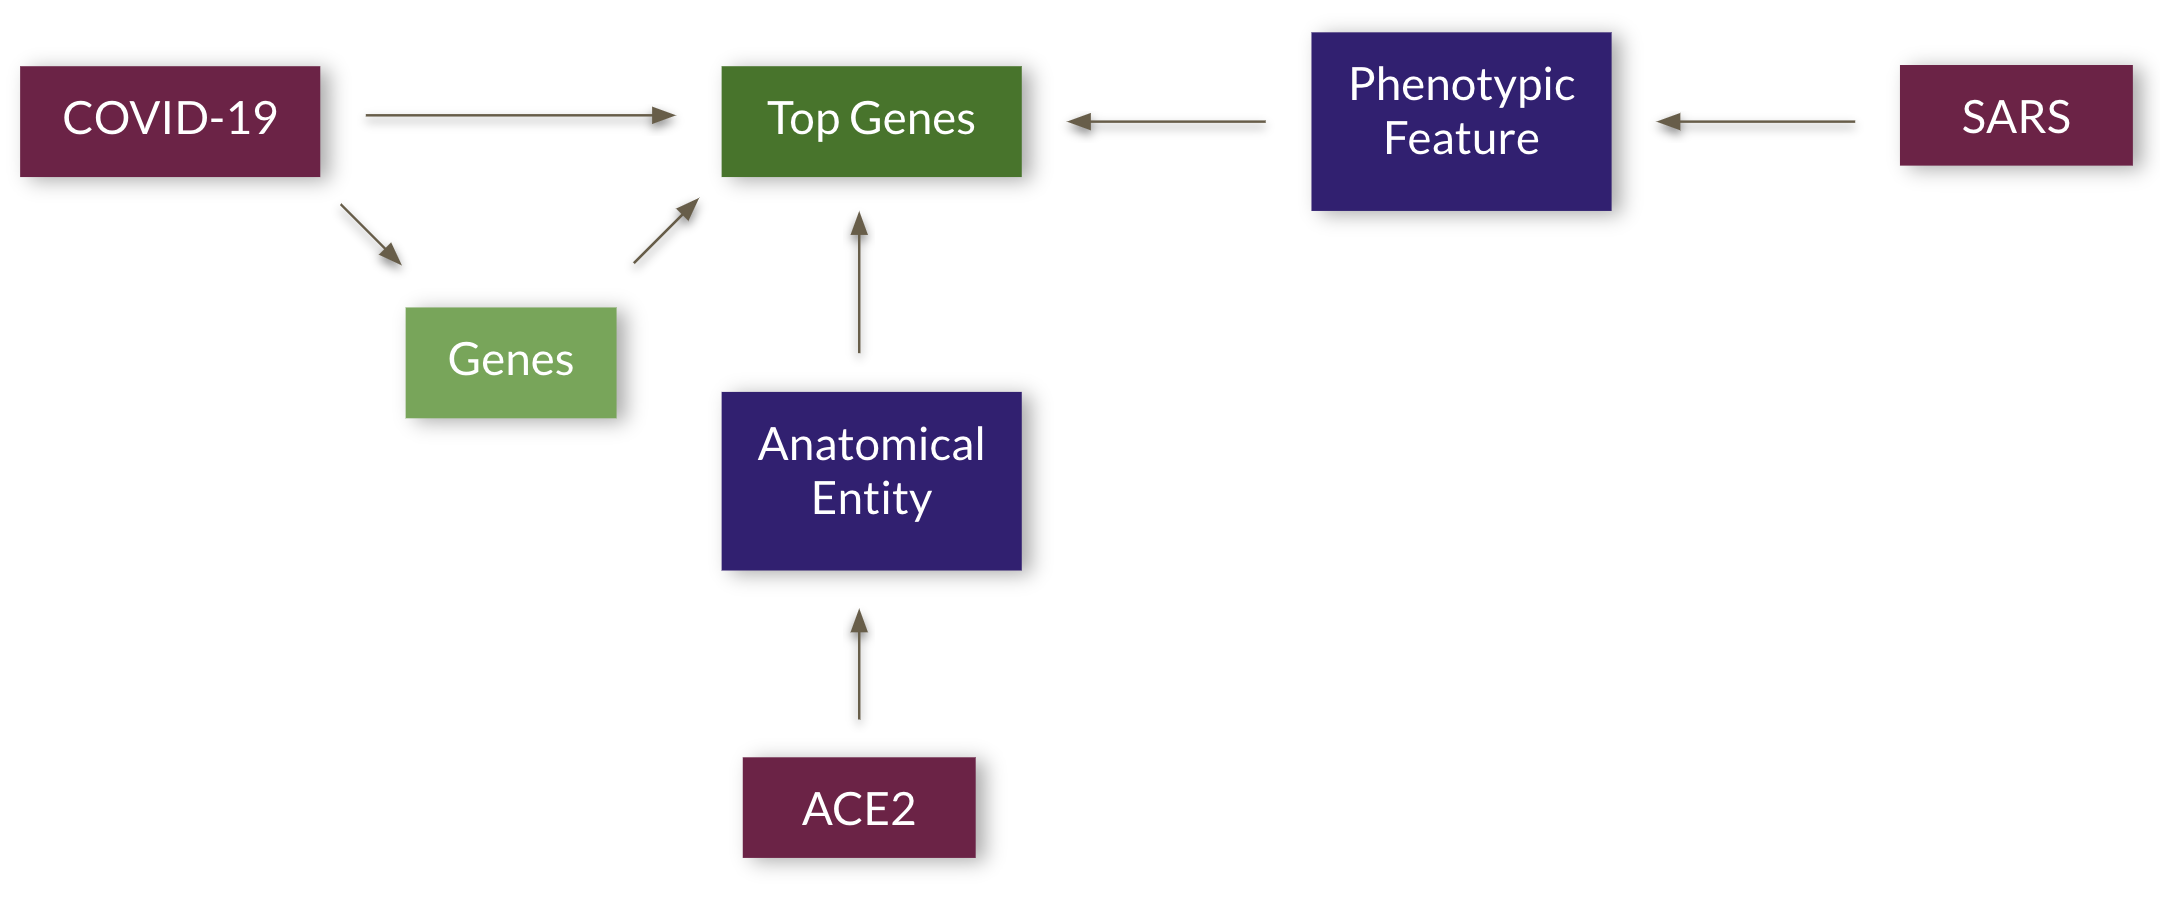

In [2]:
from IPython.display import Image
Image("img/covid_bk_top_gene_workflow.png")


## 2 Determining Related Genes
&emsp;
### 2.1 Load COVID-19, ACE2, and SARS nodes
&emsp;

In [3]:
covid = ht.query('COVID-19')['Disease'][0]
covid

{'MONDO': 'MONDO:0100096',
 'DOID': 'DOID:0080600',
 'name': 'COVID-19',
 'primary': {'identifier': 'MONDO',
  'cls': 'Disease',
  'value': 'MONDO:0100096'},
 'display': 'MONDO(MONDO:0100096) DOID(DOID:0080600) name(COVID-19)',
 'type': 'Disease'}

In [4]:
SARS = ht.query("severe acute respiratory syndrome")["Disease"][0]
SARS

{'MONDO': 'MONDO:0005091',
 'DOID': 'DOID:2945',
 'UMLS': 'C1175175',
 'name': 'severe acute respiratory syndrome',
 'MESH': 'D045169',
 'ORPHANET': '140896',
 'primary': {'identifier': 'MONDO',
  'cls': 'Disease',
  'value': 'MONDO:0005091'},
 'display': 'MONDO(MONDO:0005091) DOID(DOID:2945) ORPHANET(140896) UMLS(C1175175) MESH(D045169) name(severe acute respiratory syndrome)',
 'type': 'Disease'}

In [5]:
ACE2 = ht.query("ACE2")["Gene"][0]
ACE2

{'NCBIGene': '59272',
 'name': 'angiotensin I converting enzyme 2',
 'SYMBOL': 'ACE2',
 'UMLS': 'C1422064',
 'HGNC': '13557',
 'UNIPROTKB': 'Q9BYF1',
 'ENSEMBL': 'ENSG00000130234',
 'primary': {'identifier': 'NCBIGene', 'cls': 'Gene', 'value': '59272'},
 'display': 'NCBIGene(59272) ENSEMBL(ENSG00000130234) HGNC(13557) UMLS(C1422064) UNIPROTKB(Q9BYF1) SYMBOL(ACE2)',
 'type': 'Gene'}

## 2.2 COVID -> Genes

In [6]:
pd1 = Predict(
    input_objs=[covid],
    intermediate_nodes=[], 
    output_types =['Gene'], 
    config= {"expand": False}
)
pd1.connect(verbose=False)
df1 = pd1.display_table_view()
# fc1 = FindConnection(input_obj=covid, output_obj='Gene', intermediate_nodes=None)
# fc1.connect(verbose=False)
# df1 = fc1.display_table_view()

In [7]:
df1

,input_id,input_label,input_type,pred1,pred1_source,pred1_api,pred1_publications,output_id,output_label,output_type,output_degree
0,MONDO:0100096,COVID-19,Disease,related_to,scigraph,Automat CORD19 Scigraph API,None,NCBIGene:4141,MARS1,Gene,None
1,MONDO:0100096,COVID-19,Disease,related_to,scigraph,Automat CORD19 Scigraph API,None,NCBIGene:6651,SON,Gene,None
2,MONDO:0100096,COVID-19,Disease,related_to,scigraph,Automat CORD19 Scigraph API,None,NCBIGene:1401,CRP,Gene,None
3,MONDO:0100096,COVID-19,Disease,related_to,scigraph,Automat CORD19 Scigraph API,None,NCBIGene:59272,ACE2,Gene,None
4,MONDO:0100096,COVID-19,Disease,related_to,scigraph,Automat CORD19 Scigraph API,None,NCBIGene:7054,TH,Gene,None
5,MONDO:0100096,COVID-19,Disease,related_to,scigraph,Automat CORD19 Scigraph API,None,NCBIGene:5447,POR,Gene,None
6,MONDO:0100096,COVID-19,Disease,related_to,scigraph,Automat CORD19 Scigraph API,None,NCBIGene:7113,TMPRSS2,Gene,None
7,MONDO:0100096,COVID-19,Disease,related_to,gwascatalog,BioLink API,PMID:32558485,NCBIGene:28,ABO,Gene,None
8,MONDO:0100096,COVID-19,Disease,related_to,gwascatalog,BioLink API,PMID:32558485,NCBIGene:54585,LZTFL1,Gene,None
9,MONDO:0100096,COVID-19,Disease,related_to,DISEASES,DISEASES API,None,NCBIGene:920,CD4,Gene,None


## 2.3 COVID -> Genes -> Genes

In [8]:
query_config = {
    "annotate": ["nodeDegree"],
    "expand": False
}
## way to filter at the gene step for top x number of genes? 
pd2 = Predict(
    input_objs=[covid],
    intermediate_nodes =['Gene'], 
    output_types =['Gene'], 
    config= query_config 
)
pd2.connect(verbose=False)

In [9]:
df2 = pd2.display_table_view(extra_fields=["nodeDegree"]).sort_values(by="output_degree")
df2 = df2[df2["output_degree"] > 15]
genes_related_to_cov_w_int = list(dict.fromkeys(list(df2["output_label"])))
genes_related_to_cov_w_int = [x for x in genes_related_to_cov_w_int if not x.startswith('UMLS')]
print(genes_related_to_cov_w_int)
print(len(genes_related_to_cov_w_int))

['FGF2', 'PSMD9', 'CX3CL1', 'IFNG', 'NOTCH1', 'PPIG', 'STAT4', 'VIP', 'IFIT1', 'CCR6', 'TH', 'RAF1', 'EGR1', 'SOD1', 'FOXP3', 'CBL', 'RHOA', 'LPL', 'PTGS2', 'MSC', 'BAX', 'SOAT1', 'ACE2', 'KLRK1', 'CXCL9', 'LCK', 'TNFRSF1A', 'TLR8', 'REL', 'TLR5', 'TF', 'JAG1', 'IFNAR1', 'FCGR3A', 'LIF', 'CCR2', 'CCR1', 'GPI', 'IL4', 'IFI27', 'MTOR', 'CXCL10', 'STAT1', 'ITGAX', 'H3P16', 'TCEAL1', 'REG1A', 'SELL', 'GRK2', 'C5AR1', 'ADRA1D', 'TIMP1', 'CXCL2', 'DPP4', 'LOX', 'NCAM1', 'IL7', 'CD19', 'IRF1', 'SGSM3', 'PTH', 'CD79A', 'IFNB1', 'SP1', 'CCL20', 'TLR7', 'ITIH4', 'LBR', 'PTPN11', 'MYD88', 'CD14', 'STAT6', 'PIK3CB', 'SERPINE1', 'CDKN1A', 'HSPA4', 'MPO', 'IL9', 'CD44', 'PPARA', 'SOCS3', 'TNFRSF10B', 'TNFSF11', 'ESR1', 'ERCC8', 'IRF3', 'HSPA9', 'CSH1', 'MAPK3', 'TRBV20OR9-2', 'TLR3', 'TAT', 'ICAM1', 'PLAT', 'CD2', 'ACE', 'TFRC', 'ADA', 'SYK', 'EGF', 'HLA-E', 'GORASP1', 'ERVK-10', 'AGTR1', 'CCL3', 'ISG20', 'IL3', 'CD69', 'CREB1', 'PTPRC', 'SYT1', 'LEP', 'AHSA1', 'POLDIP2', 'IGHE', 'CD80', 'CXCR4', 'P

In [10]:
## covert genes from "covid -> genes" and "covid -> genes -> genes" outputs to data node list
genes_related_to_covid = list(dict.fromkeys(list(df1["output_label"]) + genes_related_to_cov_w_int))
genes_related_to_covid
#covid_gene_inputs

['MARS1',
 'SON',
 'CRP',
 'ACE2',
 'TH',
 'POR',
 'TMPRSS2',
 'ABO',
 'LZTFL1',
 'CD4',
 'CCL2',
 'IL2',
 'IFNG',
 'SH2D3A',
 'SPECC1',
 'IL1B',
 'IL7',
 'REN',
 'IFNA1',
 'ACE',
 'ALB',
 'SLC6A19',
 'CXCL10',
 'CXCL8',
 'F2',
 'ADAM17',
 'GAK',
 'CLEC4M',
 'SH2D3C',
 'PPP1CA',
 'BSG',
 'F3',
 'TMPRSS11A',
 'TNNI3',
 'IL17A',
 'CTSL',
 'DPP4',
 'AGTR2',
 'HMGN4',
 'IL2RA',
 'IFNB1',
 'SYMBOL:TMEM27',
 'GPT',
 'MB',
 'IFITM3',
 'IL6',
 'AAK1',
 'CD8A',
 'TNF',
 'IL10',
 'AGTR1',
 'CTRL',
 'SARS2',
 'CCL3',
 'FURIN',
 'FGF2',
 'PSMD9',
 'CX3CL1',
 'NOTCH1',
 'PPIG',
 'STAT4',
 'VIP',
 'IFIT1',
 'CCR6',
 'RAF1',
 'EGR1',
 'SOD1',
 'FOXP3',
 'CBL',
 'RHOA',
 'LPL',
 'PTGS2',
 'MSC',
 'BAX',
 'SOAT1',
 'KLRK1',
 'CXCL9',
 'LCK',
 'TNFRSF1A',
 'TLR8',
 'REL',
 'TLR5',
 'TF',
 'JAG1',
 'IFNAR1',
 'FCGR3A',
 'LIF',
 'CCR2',
 'CCR1',
 'GPI',
 'IL4',
 'IFI27',
 'MTOR',
 'STAT1',
 'ITGAX',
 'H3P16',
 'TCEAL1',
 'REG1A',
 'SELL',
 'GRK2',
 'C5AR1',
 'ADRA1D',
 'TIMP1',
 'CXCL2',
 'LOX',
 'NCAM1',

In [11]:
covid_gene_inputs = create_gene_inputs(genes_related_to_covid)


SYMBOL:TMEM27 Failed


In [12]:
covid_gene_inputs[0]

{'NCBIGene': '4141',
 'name': 'methionyl-tRNA synthetase 1',
 'SYMBOL': 'MARS1',
 'UMLS': 'C1417035',
 'HGNC': '6898',
 'UNIPROTKB': 'P56192',
 'ENSEMBL': 'ENSG00000166986',
 'primary': {'identifier': 'NCBIGene', 'cls': 'Gene', 'value': '4141'},
 'display': 'NCBIGene(4141) ENSEMBL(ENSG00000166986) HGNC(6898) UMLS(C1417035) UNIPROTKB(P56192) SYMBOL(MARS1)',
 'type': 'Gene'}

## 2.4 Genes-> Mouse genes -> Mouse Phenotypes -> Human Phenotypes

In [17]:
df2

,input_id,input_label,input_type,pred1,pred1_source,pred1_api,pred1_publications,node1_id,node1_label,node1_type,node1_degree,pred2,pred2_source,pred2_api,pred2_publications,output_id,output_label,output_type,output_degree
25620,MONDO:0100096,COVID-19,Disease,related_to,DISEASES,DISEASES API,None,NCBIGene:3586,IL10,Gene,1,negatively_regulates,SEMMED,SEMMED Gene API,PMID:29163498,NCBIGene:2247,FGF2,Gene,16
3100,MONDO:0100096,COVID-19,Disease,related_to,DISEASES,DISEASES API,None,NCBIGene:920,CD4,Gene,1,negatively_regulates,SEMMED,SEMMED Gene API,PMID:21078910,NCBIGene:5715,PSMD9,Gene,16
17131,MONDO:0100096,COVID-19,Disease,related_to,DISEASES,DISEASES API,None,NCBIGene:2875,GPT,Gene,1,negatively_regulated_by,SEMMED,SEMMED Gene API,PMID:7873591,UMLS:C0001899,UMLS:C0001899,Gene,16
2945,MONDO:0100096,COVID-19,Disease,related_to,DISEASES,DISEASES API,None,NCBIGene:920,CD4,Gene,1,negatively_regulated_by,SEMMED,SEMMED Gene API,PMID:24970890,NCBIGene:6376,CX3CL1,Gene,16
15287,MONDO:0100096,COVID-19,Disease,related_to,DISEASES,DISEASES API,None,NCBIGene:3605,IL17A,Gene,1,physically_interacts_with,string,BioLink API,None,NCBIGene:3458,IFNG,Gene,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17137,MONDO:0100096,COVID-19,Disease,related_to,DISEASES,DISEASES API,None,NCBIGene:2875,GPT,Gene,1,negatively_regulates,SEMMED,SEMMED Gene API,PMID:18289853,NCBIGene:7124,TNF,Gene,103
21907,MONDO:0100096,COVID-19,Disease,related_to,DISEASES,DISEASES API,None,NCBIGene:7124,TNF,Gene,1,physically_interacts_with,SEMMED,SEMMED Gene API,"PMID:10088765,PMID:10201981,PMID:10318823,PMID...",NCBIGene:7124,TNF,Gene,103
17742,MONDO:0100096,COVID-19,Disease,related_to,DISEASES,DISEASES API,None,NCBIGene:3569,IL6,Gene,1,negatively_regulates,SEMMED,SEMMED Gene API,"PMID:18942757,PMID:21457706,PMID:26011183,PMID...",NCBIGene:7124,TNF,Gene,103
8906,MONDO:0100096,COVID-19,Disease,related_to,DISEASES,DISEASES API,None,NCBIGene:5972,REN,Gene,1,negatively_regulates,SEMMED,SEMMED Gene API,PMID:19940035,NCBIGene:7124,TNF,Gene,103


In [13]:
#http://www.informatics.jax.org/batch
gene_to_mp = pandas.read_csv("MGIBatchReport_20201029_201300.csv", sep = "\t", error_bad_lines=False)

In [14]:
gene_to_mp.head()

,Input,Input Type,MGI Gene/Marker ID,Symbol,Name,Feature Type,MP ID,Term
0,ACE2,current symbol,MGI:1917258,Ace2,angiotensin I converting enzyme (peptidyl-dipe...,protein coding gene,MP:0000219,increased neutrophil cell number
1,ACE2,current symbol,MGI:1917258,Ace2,angiotensin I converting enzyme (peptidyl-dipe...,protein coding gene,MP:0000231,hypertension
2,ACE2,current symbol,MGI:1917258,Ace2,angiotensin I converting enzyme (peptidyl-dipe...,protein coding gene,MP:0000280,thin ventricular wall
3,ACE2,current symbol,MGI:1917258,Ace2,angiotensin I converting enzyme (peptidyl-dipe...,protein coding gene,MP:0001179,thick pulmonary interalveolar septum
4,ACE2,current symbol,MGI:1917258,Ace2,angiotensin I converting enzyme (peptidyl-dipe...,protein coding gene,MP:0001182,lung hemorrhage


In [15]:
gene_to_mp_dict = {}
for index, row in gene_to_mp.iterrows(): 
    if row["Input"] in gene_to_mp_dict:
        if(row["MP ID"] not in gene_to_mp_dict[row["Input"]]["MPs"]):
            gene_to_mp_dict[row["Input"]]["MPs"].append(row["MP ID"])
    else: 
        gene_to_mp_dict[row["Input"]] = {}
        gene_to_mp_dict[row["Input"]]["MPs"] = [row["MP ID"]]

In [24]:
gene_to_mp_dict["CD4"]

{'MPs': ['MP:0000689',
  'MP:0000921',
  'MP:0001805',
  'MP:0001806',
  'MP:0001847',
  'MP:0002145',
  'MP:0002169',
  'MP:0002347',
  'MP:0002408',
  'MP:0002432',
  'MP:0002460',
  'MP:0002722',
  'MP:0003790',
  'MP:0003944',
  'MP:0004774',
  'MP:0004804',
  'MP:0004946',
  'MP:0005010',
  'MP:0005018',
  'MP:0005027',
  'MP:0005091',
  'MP:0005092',
  'MP:0005095',
  'MP:0005348',
  'MP:0005463',
  'MP:0005466',
  'MP:0006413',
  'MP:0008074',
  'MP:0008075',
  'MP:0008078',
  'MP:0008100',
  'MP:0008698',
  'MP:0020154',
  'MP:0020937']}

In [27]:
pd3 = Predict(
    input_objs=[SARS],
    intermediate_nodes=[], 
    output_types =['PhenotypicFeature'], 
    config= {"expand": False}
)
pd3.connect(verbose=False)
df3 = pd3.display_table_view()
# df3

In [102]:
HP_IDs = []
symptom_hp_dict = {}
for result in pd3.steps_results[0]:
    HP_IDs.append(result['HP'][0])
    symptom_hp_dict[result['label']] = [result['HP'][0]]
#     print(result['label'])

HP_IDs = list(dict.fromkeys(HP_IDs))
print(HP_IDs)
print(symptom_hp_dict)

['HP:0012735', 'HP:0001945', 'HP:0002094', 'HP:0002098', 'HP:0002315', 'HP:0002721', 'HP:0003326', 'HP:0000819', 'HP:0001626', 'HP:0002664', 'HP:0004887', 'HP:0006528', 'HP:0011949', 'HP:0012418', 'HP:0025439', 'HP:0001919']
{'Cough': ['HP:0012735'], 'Fever': ['HP:0001945'], 'Dyspnea': ['HP:0002094'], 'Respiratory distress': ['HP:0002098'], 'Headache': ['HP:0002315'], 'Immunodeficiency': ['HP:0002721'], 'Myalgia': ['HP:0003326'], 'Diabetes mellitus': ['HP:0000819'], 'Abnormality of the cardiovascular system': ['HP:0001626'], 'Neoplasm': ['HP:0002664'], 'Respiratory failure requiring assisted ventilation': ['HP:0004887'], 'Chronic lung disease': ['HP:0006528'], 'Acute infectious pneumonia': ['HP:0011949'], 'Hypoxemia': ['HP:0012418'], 'Pharyngitis': ['HP:0025439'], 'Acute kidney injury': ['HP:0001919']}


In [103]:
df3

,input_id,input_label,input_type,pred1,pred1_source,pred1_api,pred1_publications,output_id,output_label,output_type,output_degree
0,MONDO:0005091,severe acute respiratory syndrome,Disease,related_to,hpoa,mydisease.info API,None,UMLS:C0010200,Cough,PhenotypicFeature,None
1,MONDO:0005091,severe acute respiratory syndrome,Disease,related_to,hpoa,mydisease.info API,None,UMLS:C0015967,Fever,PhenotypicFeature,None
2,MONDO:0005091,severe acute respiratory syndrome,Disease,related_to,hpoa,mydisease.info API,None,UMLS:C0013404,Dyspnea,PhenotypicFeature,None
3,MONDO:0005091,severe acute respiratory syndrome,Disease,related_to,hpoa,mydisease.info API,None,UMLS:C0013404,Respiratory distress,PhenotypicFeature,None
4,MONDO:0005091,severe acute respiratory syndrome,Disease,related_to,hpoa,mydisease.info API,None,UMLS:C0018681,Headache,PhenotypicFeature,None
5,MONDO:0005091,severe acute respiratory syndrome,Disease,related_to,hpoa,mydisease.info API,None,UMLS:C0021051,Immunodeficiency,PhenotypicFeature,None
6,MONDO:0005091,severe acute respiratory syndrome,Disease,related_to,hpoa,mydisease.info API,None,UMLS:C0231528,Myalgia,PhenotypicFeature,None
7,MONDO:0005091,severe acute respiratory syndrome,Disease,related_to,hpoa,mydisease.info API,None,UMLS:C0011849,Diabetes mellitus,PhenotypicFeature,None
8,MONDO:0005091,severe acute respiratory syndrome,Disease,related_to,hpoa,mydisease.info API,None,UMLS:C0243050,Abnormality of the cardiovascular system,PhenotypicFeature,None
9,MONDO:0005091,severe acute respiratory syndrome,Disease,related_to,hpoa,mydisease.info API,None,UMLS:C0027651,Neoplasm,PhenotypicFeature,None


In [104]:
sars_symptoms = list(dict.fromkeys(list(df3["output_label"])))
sars_symptoms 

['Cough',
 'Fever',
 'Dyspnea',
 'Respiratory distress',
 'Headache',
 'Immunodeficiency',
 'Myalgia',
 'Diabetes mellitus',
 'Abnormality of the cardiovascular system',
 'Neoplasm',
 'Respiratory failure requiring assisted ventilation',
 'Chronic lung disease',
 'Acute infectious pneumonia',
 'Hypoxemia',
 'Pharyngitis',
 'Acute kidney injury']

In [105]:
# HP_IDs = [];
# symptom_hp_dict = {}
# for x in sars_symptoms: 
#     q = ht.query(x)["PhenotypicFeature"]
#     for y in q:
#         if(y["name"].lower() == x.lower()):
#             print(x)
#             print(y["HP"])
#             HP_IDs.append(y["HP"])
#             symptom_hp_dict[x] = y["HP"]
# #     hp = q["HP"]
# #     print(x)
# #     print(q["name"])
# symptom_hp_dict

In [106]:
HP_IDs

['HP:0012735',
 'HP:0001945',
 'HP:0002094',
 'HP:0002098',
 'HP:0002315',
 'HP:0002721',
 'HP:0003326',
 'HP:0000819',
 'HP:0001626',
 'HP:0002664',
 'HP:0004887',
 'HP:0006528',
 'HP:0011949',
 'HP:0012418',
 'HP:0025439',
 'HP:0001919']

In [108]:
# https://biothings.ncats.io/upheno_ontology/phenotype/HP:0025038
sars_symptoms_mp_dict = {}

for key in symptom_hp_dict:
    hp = symptom_hp_dict[key][0]
    url = "https://biothings.ncats.io/upheno_ontology/phenotype/" + hp 
    r = requests.get(url)
    json = r.json()
    print(json)
    if('mp_class_id' in json):
        mp = json['mp_class_id']
        sars_symptoms_mp_dict[key] = [mp]

sars_symptoms_mp_dict


{'_id': 'HP:0012735', '_version': 1, 'fuzzy_equivalence_score': 0.875, 'fuzzy_subclass_score': 1.0, 'hp_class_label': 'Cough', 'mp_class_id': 'MP:0002133', 'mp_ontology_class_label': 'abnormal respiratory system physiology'}
{'_id': 'HP:0001945', '_version': 1, 'fuzzy_equivalence_score': 0.8888888889, 'fuzzy_subclass_score': 1.0, 'hp_class_label': 'Fever', 'mp_class_id': 'MP:0001777', 'mp_ontology_class_label': 'abnormal body temperature homeostasis'}
{'_id': 'HP:0002094', '_version': 1, 'fuzzy_equivalence_score': 0.875, 'fuzzy_subclass_score': 1.0, 'hp_class_label': 'Dyspnea', 'mp_class_id': 'MP:0002133', 'mp_ontology_class_label': 'abnormal respiratory system physiology'}
{'_id': 'HP:0002098', '_version': 1, 'fuzzy_equivalence_score': 1.0, 'fuzzy_subclass_score': 1.0, 'hp_class_label': 'Respiratory distress', 'mp_class_id': 'MP:0001954', 'mp_ontology_class_label': 'respiratory distress'}
{'_id': 'HP:0002315', '_version': 1, 'fuzzy_equivalence_score': 0.875, 'fuzzy_subclass_score': 1.

{'Cough': ['MP:0002133'],
 'Fever': ['MP:0001777'],
 'Dyspnea': ['MP:0002133'],
 'Respiratory distress': ['MP:0001954'],
 'Headache': ['MP:0003633'],
 'Immunodeficiency': ['MP:0001790'],
 'Diabetes mellitus': ['MP:0005291'],
 'Abnormality of the cardiovascular system': ['MP:0002127'],
 'Neoplasm': ['MP:0002006'],
 'Respiratory failure requiring assisted ventilation': ['MP:0001953'],
 'Chronic lung disease': ['MP:0001175'],
 'Acute infectious pneumonia': ['MP:0002406'],
 'Hypoxemia': ['MP:0012549'],
 'Pharyngitis': ['MP:0001867'],
 'Acute kidney injury': ['MP:0003606']}

In [109]:
# sars_symptoms_mp_dict = {
# 'Cough': ['MP:0031088'],
# 'Dyspnea': ['MP:0001954','MP:0002317'],
# 'Respiratory distress': ['MP:0001954','MP:0002317'],
# 'Abnormality of the cardiovascular system': ['MP:0000177', 'MP:0000302', 'MP:0001623', 'MP:0001626', 'MP:0002130'],
# 'Neoplasm': ['MP:0002006'],
# 'Respiratory failure requiring assisted ventilation': ['MP:0001953'],
# 'Acute infectious pneumonia': ['MP:0001861'],
# 'Hypoxemia': ['MP:0012549'],
# 'Pharyngitis': ['MP:0031095']
#  }

In [110]:
reverse_dict = {}

for key in sars_symptoms_mp_dict:
    for x in sars_symptoms_mp_dict[key]:
        reverse_dict[x] = key

In [111]:
reverse_dict

{'MP:0002133': 'Dyspnea',
 'MP:0001777': 'Fever',
 'MP:0001954': 'Respiratory distress',
 'MP:0003633': 'Headache',
 'MP:0001790': 'Immunodeficiency',
 'MP:0005291': 'Diabetes mellitus',
 'MP:0002127': 'Abnormality of the cardiovascular system',
 'MP:0002006': 'Neoplasm',
 'MP:0001953': 'Respiratory failure requiring assisted ventilation',
 'MP:0001175': 'Chronic lung disease',
 'MP:0002406': 'Acute infectious pneumonia',
 'MP:0012549': 'Hypoxemia',
 'MP:0001867': 'Pharyngitis',
 'MP:0003606': 'Acute kidney injury'}

In [112]:
MP_list = list(sars_symptoms_mp_dict.values())
MP_list = list(itertools.chain.from_iterable(MP_list))
MP_list

['MP:0002133',
 'MP:0001777',
 'MP:0002133',
 'MP:0001954',
 'MP:0003633',
 'MP:0001790',
 'MP:0005291',
 'MP:0002127',
 'MP:0002006',
 'MP:0001953',
 'MP:0001175',
 'MP:0002406',
 'MP:0012549',
 'MP:0001867',
 'MP:0003606']

In [113]:
for key in gene_to_mp_dict:
    gene_to_mp_dict[key]["sars_symptom_count"] = (len(set(gene_to_mp_dict[key]['MPs']) 
                                                      & set(MP_list))
                                                 )
    gene_to_mp_dict[key]["sars_symptoms"] = (set(gene_to_mp_dict[key]['MPs']) 
                                                      & set(MP_list))
    gene_to_mp_dict[key]["sars_symptoms_phen"] = []
    for x in gene_to_mp_dict[key]["sars_symptoms"]:
        gene_to_mp_dict[key]["sars_symptoms_phen"].append(reverse_dict[x])

In [114]:
gene_to_mp_dict['IL2']["sars_symptoms"]
output_dict = gene_to_mp_dict

In [115]:
 output_df = pandas.DataFrame.from_dict(output_dict, orient='index')

In [116]:
 output_df =  output_df[output_df["sars_symptom_count"] > 0]

In [117]:
 output_df.to_csv("MP_phen_table.csv")

In [118]:
 output_df

,MPs,sars_symptom_count,sars_symptoms,sars_symptoms_phen
TMPRSS2,"[MP:0001861, MP:0002169, MP:0003009, MP:000360...",1,{MP:0005291},[Diabetes mellitus]
TH,"[MP:0000255, MP:0000267, MP:0000279, MP:000074...",1,{MP:0001953},[Respiratory failure requiring assisted ventil...
IFNG,"[MP:0000218, MP:0000219, MP:0000220, MP:000022...",1,{MP:0001175},[Chronic lung disease]
IL1B,"[MP:0000920, MP:0000953, MP:0001273, MP:000187...",1,{MP:0001777},[Fever]
ADAM17,"[MP:0000065, MP:0000066, MP:0000135, MP:000016...",3,"{MP:0001175, MP:0001953, MP:0001954}","[Chronic lung disease, Respiratory failure req..."
SH2D3C,"[MP:0000837, MP:0000965, MP:0000968, MP:000114...",1,{MP:0003633},[Headache]
BSG,"[MP:0000598, MP:0000601, MP:0000715, MP:000115...",1,{MP:0001954},[Respiratory distress]
TNNI3,"[MP:0000266, MP:0000278, MP:0001544, MP:000162...",1,{MP:0001954},[Respiratory distress]
IL17A,"[MP:0000208, MP:0000222, MP:0000322, MP:000117...",1,{MP:0001790},[Immunodeficiency]
DPP4,"[MP:0000219, MP:0000220, MP:0000223, MP:000118...",1,{MP:0001954},[Respiratory distress]


In [119]:
genes_with_sars_symptoms_MP = []

for key in gene_to_mp_dict:
    if(gene_to_mp_dict[key]["sars_symptom_count"] > 0):
        print(key)
        print(gene_to_mp_dict[key]["sars_symptom_count"])
        genes_with_sars_symptoms_MP.append(key)

TMPRSS2
1
TH
1
IFNG
1
IL1B
1
ADAM17
3
SH2D3C
1
BSG
1
TNNI3
1
IL17A
1
DPP4
1
IL6
2
TNF
6
IL10
1
RAF1
1
FOXP3
1
PTGS2
1
TNFRSF1A
2
REL
1
IL4
1
CCR2
1
ITGAX
1
IRF1
1
CD79A
1
MYD88
3
SERPINE1
1
PPARA
1
CDKN1A
2
TNFSF11
2
ICAM1
1
TLR3
1
SYK
1
PTPRC
2
CXCR4
2
FAS
2
APP
1
CISH
1
CCR5
1
EGFR
2
TLR4
1
STAT3
3
CAMP
1
TGFB1
2
VEGFA
4


In [120]:
genes_with_sars_symptoms_MP

['TMPRSS2',
 'TH',
 'IFNG',
 'IL1B',
 'ADAM17',
 'SH2D3C',
 'BSG',
 'TNNI3',
 'IL17A',
 'DPP4',
 'IL6',
 'TNF',
 'IL10',
 'RAF1',
 'FOXP3',
 'PTGS2',
 'TNFRSF1A',
 'REL',
 'IL4',
 'CCR2',
 'ITGAX',
 'IRF1',
 'CD79A',
 'MYD88',
 'SERPINE1',
 'PPARA',
 'CDKN1A',
 'TNFSF11',
 'ICAM1',
 'TLR3',
 'SYK',
 'PTPRC',
 'CXCR4',
 'FAS',
 'APP',
 'CISH',
 'CCR5',
 'EGFR',
 'TLR4',
 'STAT3',
 'CAMP',
 'TGFB1',
 'VEGFA']

In [121]:
covid_sars_mp_gene_inputs = create_gene_inputs(genes_with_sars_symptoms_MP)

## 2.4  Filter Top Genes by those also related to 5+ of the Anatomical Entities from "ACE2 -> Anatomical Entities" 

In [77]:
genes_related_to_AE = predict_many([ACE2],covid_gene_inputs,['AnatomicalEntity'])

# pd4 = Predict(
#     input_objs=[covid_gene_inputs],
#     intermediate_nodes=['AnatomicalEntity'], 
#     output_types =[ACE2], 
#     config= {"expand": False}
# )
# pd4.connect(verbose=False)
# df4 = pd4.display_table_view()
# df4

The second query doesn't return any result. So BTE does not find any connection between your input and output


In [78]:
genes_related_to_AE

,input,input_type,pred1,pred1_source,pred1_api,pred1_pubmed,node1_type,node1_name,node1_id,pred2,pred2_source,pred2_api,pred2_pubmed,output_type,output_name,output_id
0,ACE2,Gene,related_to,None,BioLink API,None,AnatomicalEntity,SKELETAL MUSCLE ORGAN,UBERON:UBERON:0014892,related_to,None,BioLink API,None,AnatomicalEntity,ACE2,NCBIGene:59272
1,ACE2,Gene,related_to,None,BioLink API,None,AnatomicalEntity,EPITHELIUM OF LACTIFEROUS GLAND,UBERON:UBERON:0003244,related_to,None,BioLink API,None,AnatomicalEntity,ACE2,NCBIGene:59272
2,ACE2,Gene,related_to,None,BioLink API,None,AnatomicalEntity,ENDOMETRIUM,UBERON:UBERON:0001295,related_to,None,BioLink API,None,AnatomicalEntity,ACE2,NCBIGene:59272
3,ACE2,Gene,related_to,None,BioLink API,None,AnatomicalEntity,CORONARY ARTERIAL TREE,UBERON:UBERON:0001621,related_to,None,BioLink API,None,AnatomicalEntity,ACE2,NCBIGene:59272
4,ACE2,Gene,related_to,None,BioLink API,None,AnatomicalEntity,DUCTUS LACTIFERI,UBERON:UBERON:0001765,related_to,None,BioLink API,None,AnatomicalEntity,ACE2,NCBIGene:59272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,ACE2,Gene,related_to,Translator Text Mining Provider,CORD Gene API,None,AnatomicalEntity,KIDNEY,UBERON:UBERON:0002113,related_to,Translator Text Mining Provider,CORD Gene API,None,AnatomicalEntity,MAPK1,NCBIGene:5594
2,ACE2,Gene,related_to,Translator Text Mining Provider,CORD Gene API,None,AnatomicalEntity,ANATOMICAL UNIT,UBERON:UBERON:0000062,related_to,Translator Text Mining Provider,CORD Gene API,None,AnatomicalEntity,MAPK1,NCBIGene:5594
3,ACE2,Gene,related_to,Translator Text Mining Provider,CORD Gene API,None,AnatomicalEntity,PORTION OF TISSUE,UBERON:UBERON:0000479,related_to,Translator Text Mining Provider,CORD Gene API,None,AnatomicalEntity,MAPK1,NCBIGene:5594
4,ACE2,Gene,related_to,Translator Text Mining Provider,CORD Gene API,None,AnatomicalEntity,CARDIUM,UBERON:UBERON:0000948,related_to,Translator Text Mining Provider,CORD Gene API,None,AnatomicalEntity,MAPK1,NCBIGene:5594


In [79]:
gene_list_2 = list(genes_related_to_AE["output_name"])
d = {x:gene_list_2.count(x) for x in gene_list_2}
d2_gene_df = pandas.DataFrame.from_dict({k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse = True)}, orient='index').iloc[0:50]
d2_gene_df.columns = ["count"]
d2_gene_df

,count
ACE2,31
ACE,17
CRP,16
TNF,16
TH,15
REN,15
CISH,15
MSC,14
IL4,14
IL2RA,13


In [80]:
v2_genes = list(d2_gene_df[d2_gene_df["count"] >= 1].index)
print(v2_genes)

['ACE2', 'ACE', 'CRP', 'TNF', 'TH', 'REN', 'CISH', 'MSC', 'IL4', 'IL2RA', 'IL10', 'AGTR1', 'INS', 'CD4', 'POMC', 'CA2', 'CD28', 'CCL2', 'IFNA1', 'F3', 'IL6', 'PSMD9', 'CCR2', 'PTH', 'LEP', 'ALB', 'GPT', 'CD2', 'ISG20', 'GRAP2', 'FAS', 'CCR5', 'CAT', 'EGFR', 'AKT1', 'AGTR2', 'MB', 'FOXP3', 'TF', 'REG1A', 'CCL20', 'ICAM1', 'PIK3CA', 'CXCL8', 'IL17A', 'DPP4', 'CX3CL1', 'CXCL9', 'LCK', 'MTOR']


In [81]:
v2_gene_inputs = create_gene_inputs(v2_genes)
v2_gene_inputs

[{'NCBIGene': '59272',
  'name': 'angiotensin I converting enzyme 2',
  'SYMBOL': 'ACE2',
  'UMLS': 'C1422064',
  'HGNC': '13557',
  'UNIPROTKB': 'Q9BYF1',
  'ENSEMBL': 'ENSG00000130234',
  'primary': {'identifier': 'NCBIGene', 'cls': 'Gene', 'value': '59272'},
  'display': 'NCBIGene(59272) ENSEMBL(ENSG00000130234) HGNC(13557) UMLS(C1422064) UNIPROTKB(Q9BYF1) SYMBOL(ACE2)',
  'type': 'Gene'},
 {'NCBIGene': '1636',
  'name': 'angiotensin I converting enzyme',
  'SYMBOL': 'ACE',
  'UMLS': 'C1413931',
  'HGNC': '2707',
  'UNIPROTKB': 'P12821',
  'ENSEMBL': 'ENSG00000159640',
  'primary': {'identifier': 'NCBIGene', 'cls': 'Gene', 'value': '1636'},
  'display': 'NCBIGene(1636) ENSEMBL(ENSG00000159640) HGNC(2707) UMLS(C1413931) UNIPROTKB(P12821) SYMBOL(ACE)',
  'type': 'Gene'},
 {'NCBIGene': '1401',
  'name': 'C-reactive protein',
  'SYMBOL': 'CRP',
  'UMLS': 'C1413716',
  'HGNC': '2367',
  'UNIPROTKB': 'P02741',
  'ENSEMBL': 'ENSG00000132693',
  'primary': {'identifier': 'NCBIGene', 'cls': 

## 2.5 Filter Top Genes by those also related to 1+ of the SARS phenotypes or biological processes

In [82]:
genes_related_to_phens = predict_many(covid_gene_inputs,[SARS],['BiologicalProcess','PhenotypicFeature'])
genes_related_to_phens

The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doe

The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doesn't return any result. So BTE does not find any connection between your input and output
The first query doe

,input,input_type,pred1,pred1_source,pred1_api,pred1_pubmed,node1_type,node1_name,node1_id,pred2,pred2_source,pred2_api,pred2_pubmed,output_type,output_name,output_id
0,ACE2,Gene,affects,SEMMED,SEMMED Gene API,15825152,BiologicalProcess,C0007613,UMLS:C0007613,affects,SEMMED,SEMMED Disease API,19364769,BiologicalProcess,ACUTE RESPIRATORY CORONAVIRUS INFECTION,MONDO:MONDO:0005091
1,ACE2,Gene,disrupts,SEMMED,SEMMED Gene API,27806985,BiologicalProcess,C0007613,UMLS:C0007613,affects,SEMMED,SEMMED Disease API,19364769,BiologicalProcess,ACUTE RESPIRATORY CORONAVIRUS INFECTION,MONDO:MONDO:0005091
2,ACE2,Gene,affects,SEMMED,SEMMED Gene API,23013041,BiologicalProcess,C0017262,UMLS:C0017262,affects,SEMMED,SEMMED Disease API,"12565954,12650527,12749904,3208739",BiologicalProcess,ACUTE RESPIRATORY CORONAVIRUS INFECTION,MONDO:MONDO:0005091
3,ACE2,Gene,affects,SEMMED,SEMMED Gene API,23013041,BiologicalProcess,C0017262,UMLS:C0017262,related_to,SEMMED,SEMMED Disease API,8049444,BiologicalProcess,ACUTE RESPIRATORY CORONAVIRUS INFECTION,MONDO:MONDO:0005091
4,ACE2,Gene,affects,SEMMED,SEMMED Gene API,23013041,BiologicalProcess,C0017262,UMLS:C0017262,affected_by,SEMMED,SEMMED Disease API,16174304,BiologicalProcess,ACUTE RESPIRATORY CORONAVIRUS INFECTION,MONDO:MONDO:0005091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,MAPK1,Gene,related_to,Translator Text Mining Provider,CORD Gene API,None,BiologicalProcess,GENE EXPRESSION,GO:GO:0010467,related_to,Translator Text Mining Provider,CORD Disease API,None,BiologicalProcess,ACUTE RESPIRATORY CORONAVIRUS INFECTION,MONDO:MONDO:0005091
62,MAPK1,Gene,related_to,Translator Text Mining Provider,CORD Gene API,None,BiologicalProcess,BREAKDOWN,GO:GO:0009056,related_to,Translator Text Mining Provider,CORD Disease API,None,BiologicalProcess,ACUTE RESPIRATORY CORONAVIRUS INFECTION,MONDO:MONDO:0005091
63,MAPK1,Gene,related_to,Translator Text Mining Provider,CORD Gene API,None,BiologicalProcess,CELL MIGRATION,GO:GO:0016477,related_to,Translator Text Mining Provider,CORD Disease API,None,BiologicalProcess,ACUTE RESPIRATORY CORONAVIRUS INFECTION,MONDO:MONDO:0005091
64,MAPK1,Gene,related_to,Translator Text Mining Provider,CORD Gene API,None,BiologicalProcess,NEURAL TUBE FORMATION,GO:GO:0001841,related_to,Translator Text Mining Provider,CORD Disease API,None,BiologicalProcess,ACUTE RESPIRATORY CORONAVIRUS INFECTION,MONDO:MONDO:0005091


In [83]:
v3_genes = list(dict.fromkeys(list(genes_related_to_phens["input"])))
v3_gene_inputs = create_gene_inputs(v3_genes)
v3_gene_inputs

[{'NCBIGene': '59272',
  'name': 'angiotensin I converting enzyme 2',
  'SYMBOL': 'ACE2',
  'UMLS': 'C1422064',
  'HGNC': '13557',
  'UNIPROTKB': 'Q9BYF1',
  'ENSEMBL': 'ENSG00000130234',
  'primary': {'identifier': 'NCBIGene', 'cls': 'Gene', 'value': '59272'},
  'display': 'NCBIGene(59272) ENSEMBL(ENSG00000130234) HGNC(13557) UMLS(C1422064) UNIPROTKB(Q9BYF1) SYMBOL(ACE2)',
  'type': 'Gene'},
 {'NCBIGene': '1401',
  'name': 'C-reactive protein',
  'SYMBOL': 'CRP',
  'UMLS': 'C1413716',
  'HGNC': '2367',
  'UNIPROTKB': 'P02741',
  'ENSEMBL': 'ENSG00000132693',
  'primary': {'identifier': 'NCBIGene', 'cls': 'Gene', 'value': '1401'},
  'display': 'NCBIGene(1401) ENSEMBL(ENSG00000132693) HGNC(2367) UMLS(C1413716) UNIPROTKB(P02741) SYMBOL(CRP)',
  'type': 'Gene'},
 {'NCBIGene': '7054',
  'name': 'tyrosine hydroxylase',
  'SYMBOL': 'TH',
  'UMLS': 'C1420718',
  'HGNC': '11782',
  'UNIPROTKB': 'P07101',
  'ENSEMBL': 'ENSG00000180176',
  'primary': {'identifier': 'NCBIGene', 'cls': 'Gene', 'va

In [84]:
print(len(v3_genes))
print(v3_genes)

182
['ACE2', 'CRP', 'TH', 'SON', 'MARS1', 'POR', 'CD4', 'CCL2', 'IL2', 'IFNG', 'SH2D3A', 'IL1B', 'IL7', 'REN', 'IFNA1', 'ACE', 'ALB', 'CXCL10', 'CXCL8', 'F2', 'ADAM17', 'SH2D3C', 'BSG', 'F3', 'TNNI3', 'IL17A', 'CTSL', 'DPP4', 'AGTR2', 'HMGN4', 'IL2RA', 'IFNB1', 'GPT', 'MB', 'IFITM3', 'IL6', 'CD8A', 'TNF', 'IL10', 'AGTR1', 'CTRL', 'SARS2', 'CCL3', 'FURIN', 'VIP', 'CX3CL1', 'STAT4', 'SOD1', 'NOTCH1', 'FGF2', 'IFIT1', 'PSMD9', 'EGR1', 'CBL', 'RAF1', 'FOXP3', 'PPIG', 'CCR6', 'MSC', 'LPL', 'PTGS2', 'KLRK1', 'TNFRSF1A', 'BAX', 'TLR5', 'TLR8', 'SOAT1', 'RHOA', 'CXCL9', 'LCK', 'TF', 'REL', 'IFI27', 'IL4', 'LIF', 'CCR2', 'GPI', 'JAG1', 'FCGR3A', 'CCR1', 'IFNAR1', 'GRK2', 'ITGAX', 'MTOR', 'SELL', 'TCEAL1', 'STAT1', 'ADRA1D', 'REG1A', 'C5AR1', 'CD19', 'TIMP1', 'CXCL2', 'LOX', 'IRF1', 'NCAM1', 'SP1', 'CD79A', 'TLR7', 'CCL20', 'ITIH4', 'LBR', 'PTH', 'SGSM3', 'CD14', 'PTPN11', 'MYD88', 'PIK3CB', 'STAT6', 'SERPINE1', 'CD44', 'MPO', 'PPARA', 'CDKN1A', 'IL9', 'HSPA4', 'TNFSF11', 'ESR1', 'IRF3', 'SOCS3'

OK 

In [122]:
final_genes = list(dict.fromkeys(list(genes_with_sars_symptoms_MP + v2_genes + v3_genes)))

In [123]:
final_genes

['TMPRSS2',
 'TH',
 'IFNG',
 'IL1B',
 'ADAM17',
 'SH2D3C',
 'BSG',
 'TNNI3',
 'IL17A',
 'DPP4',
 'IL6',
 'TNF',
 'IL10',
 'RAF1',
 'FOXP3',
 'PTGS2',
 'TNFRSF1A',
 'REL',
 'IL4',
 'CCR2',
 'ITGAX',
 'IRF1',
 'CD79A',
 'MYD88',
 'SERPINE1',
 'PPARA',
 'CDKN1A',
 'TNFSF11',
 'ICAM1',
 'TLR3',
 'SYK',
 'PTPRC',
 'CXCR4',
 'FAS',
 'APP',
 'CISH',
 'CCR5',
 'EGFR',
 'TLR4',
 'STAT3',
 'CAMP',
 'TGFB1',
 'VEGFA',
 'ACE2',
 'ACE',
 'CRP',
 'REN',
 'MSC',
 'IL2RA',
 'AGTR1',
 'INS',
 'CD4',
 'POMC',
 'CA2',
 'CD28',
 'CCL2',
 'IFNA1',
 'F3',
 'PSMD9',
 'PTH',
 'LEP',
 'ALB',
 'GPT',
 'CD2',
 'ISG20',
 'GRAP2',
 'CAT',
 'AKT1',
 'AGTR2',
 'MB',
 'TF',
 'REG1A',
 'CCL20',
 'PIK3CA',
 'CXCL8',
 'CX3CL1',
 'CXCL9',
 'LCK',
 'MTOR',
 'SON',
 'MARS1',
 'POR',
 'IL2',
 'SH2D3A',
 'IL7',
 'CXCL10',
 'F2',
 'CTSL',
 'HMGN4',
 'IFNB1',
 'IFITM3',
 'CD8A',
 'CTRL',
 'SARS2',
 'CCL3',
 'FURIN',
 'VIP',
 'STAT4',
 'SOD1',
 'NOTCH1',
 'FGF2',
 'IFIT1',
 'EGR1',
 'CBL',
 'PPIG',
 'CCR6',
 'LPL',
 'KLRK1',
 '

In [124]:
final_gene_inputs = create_gene_inputs(final_genes)

## 3 Investigate Top Genes
## 3.1 Top Genes -> Pathways 

In [125]:
pd7 = Predict(
    input_objs=final_gene_inputs,
    intermediate_nodes=[], 
    output_types =['Pathway'], 
    config= {"expand": False}
)
pd7.connect(verbose=False)
df7 = pd7.display_table_view()


In [132]:
df7

,input_id,input_label,input_type,pred1,pred1_source,pred1_api,pred1_publications,output_id,output_label,output_type,output_degree
0,NCBIGene:2147,"coagulation factor II, thrombin",Gene,functional_association,CPDB,MyGene.info API,None,WIKIPATHWAYS:WP15,Selenium Micronutrient Network,Pathway,None
1,NCBIGene:2147,"coagulation factor II, thrombin",Gene,functional_association,CPDB,MyGene.info API,None,WIKIPATHWAYS:WP1533,Vitamin B12 Metabolism,Pathway,None
2,NCBIGene:2147,"coagulation factor II, thrombin",Gene,functional_association,CPDB,MyGene.info API,None,WIKIPATHWAYS:WP176,Folate Metabolism,Pathway,None
3,NCBIGene:2147,"coagulation factor II, thrombin",Gene,functional_association,CPDB,MyGene.info API,None,WIKIPATHWAYS:WP272,Blood Clotting Cascade,Pathway,None
4,NCBIGene:2147,"coagulation factor II, thrombin",Gene,functional_association,CPDB,MyGene.info API,None,WIKIPATHWAYS:WP2865,IL1 and megakaryocytes in obesity,Pathway,None
...,...,...,...,...,...,...,...,...,...,...,...
6706,NCBIGene:156,G protein-coupled receptor kinase 2,Gene,functional_association,CPDB,MyGene.info API,None,REACT:R-HSA-9006925,Intracellular signaling by second messengers,Pathway,None
6707,NCBIGene:6646,sterol O-acyltransferase 1,Gene,functional_association,CPDB,MyGene.info API,None,REACT:R-HSA-174824,"Plasma lipoprotein assembly, remodeling, and c...",Pathway,None
6708,NCBIGene:6646,sterol O-acyltransferase 1,Gene,functional_association,CPDB,MyGene.info API,None,REACT:R-HSA-382551,Transport of small molecules,Pathway,None
6709,NCBIGene:6646,sterol O-acyltransferase 1,Gene,functional_association,CPDB,MyGene.info API,None,REACT:R-HSA-8964038,LDL clearance,Pathway,None


In [126]:
genes_to_pathways = df7
print(genes_to_pathways.shape)
## only use WIKIPATHWAYS AT THE MOMENT - ONLY SOURCE WITH GENE SETS WITH ASSOCIATED PATHWAYS 
genes_to_pathways = genes_to_pathways[genes_to_pathways["output_id"].str.contains('WIKIPATHWAYS')]
print(genes_to_pathways.shape)

(6711, 11)
(2271, 11)


In [128]:
## Use custom wikipathway_dict.json - {pathway: pathway_genes, pathway_gene_ids}
import json as json 

with open('wikipathway_dict.json') as f:
    wikipathway_dict = json.load(f)
## example entry: 
print(wikipathway_dict["ACE INHIBITOR PATHWAY"])

{'pathway_genes': ['NOS3', 'AGTR2', 'BDKRB1', 'TFs', 'AGTR1', 'TGFB1', 'CTSG', 'KNG1', 'ACE', 'CMA1', 'REN', 'CYP11B2', 'MAS1', 'ACE2', 'AGT', 'NR3C2', 'ATP6AP2', 'BDKRB2'], 'pathway_gene_ids': ['4846', '186', '623', '', '185', '7040', '1511', '3827', '1636', '1215', '5972', '1585', '4142', '59272', '183', '4306', '10159', '624']}


In [129]:
all_genes = []
for key in wikipathway_dict:
    all_genes = all_genes + wikipathway_dict[key]['pathway_genes']
## values needed for hyperparametric statistical analysis
genes_in_wiki_pathways = len(list(dict.fromkeys(list(all_genes))))
bf_c = len(list(wikipathway_dict.keys()))

In [146]:
# wikipathway_dict['Vitamin B12 Metabolism'.upper()]

{'pathway_genes': ['MCP1',
  'NFkB2',
  'IF*',
  'TCN2*',
  'RELA',
  'HC',
  'Megalin',
  'CUBN',
  'NFkB1',
  'MM-CoA-H',
  'CBR',
  'MMAB',
  'MAT',
  'MTR*',
  'MCEE',
  'MSR*',
  'MUT',
  'SHMT',
  'CBS',
  'MPO',
  'PAI-1',
  'tPA',
  'PLG',
  'Thrombin',
  'Factor VII',
  'SOD3',
  'CTH',
  'MTHFR*',
  'SOD1',
  'ACT',
  'LDLR',
  'APOB',
  'SRB1',
  'ABCA1',
  'SAA4',
  'SAA3',
  'APOA1',
  'SAA1',
  'APOE',
  'APOA1-NO2Tyr',
  'SAA2',
  'SOD2',
  'D-dimer',
  'TNFa',
  'HbA1c',
  'Fibrinogen',
  'IL1B',
  'INSR',
  'IL6',
  'IL10',
  'ALB',
  'INS',
  'RANTES',
  'HBA1',
  'sICAM-1',
  'HBB',
  'Fibrin',
  'CRP',
  'FGA',
  'FGB',
  'FGG'],
 'pathway_gene_ids': ['6347',
  '4791',
  '2694',
  '6948',
  '5970',
  '6947',
  '4036',
  '8029',
  '4790',
  '3.1.2.17',
  '1.16.1.4',
  '326625',
  '4143',
  '4548',
  '84693',
  '4552',
  '4594',
  '6472',
  '875',
  '4353',
  '5054',
  '5327',
  '5340',
  '2147',
  '2155',
  '6649',
  '1491',
  '4524',
  '6647',
  '12',
  '3949',
  '3

In [147]:
# pathways
gene_to_pathway_results = {}
gene_to_pathway_pathways = list(genes_to_pathways["output_label"]) # create list of genes
gene_to_pathway_pathways = list(dict.fromkeys(gene_to_pathway_pathways))  # remove duplicates
gene_to_pathway_genes = list(dict.fromkeys(list(genes_to_pathways["input_label"])))

for pathway in gene_to_pathway_pathways: 
    total_pathway_genes = 0
    if(pathway.upper() in wikipathway_dict):
        total_pathway_genes =  len(wikipathway_dict[pathway.upper()]['pathway_genes'])
    gene_to_pathway_results[pathway] = {
        'genes_related_count' : 0,
        "genes_related" : [],
#         "weighted_score" : [],
        "genes_in_pathway": total_pathway_genes,
        "p-value": None
    }

    
for index, row in genes_to_pathways.iterrows():
    gene_to_pathway_results[row['output_label']]['genes_related_count'] = gene_to_pathway_results[row['output_label']]['genes_related_count'] + 1
    gene_to_pathway_results[row['output_label']]['genes_related'].append(row['input_label'])

for index, row in genes_to_pathways.iterrows():
    score = 0 
    gene_to_pathway_results[row['output_label']]['genes_related_count'] = len(list(dict.fromkeys(list( gene_to_pathway_results[row['output_label']]['genes_related']))))
    if(gene_to_pathway_results[row['output_label']]['genes_in_pathway'] > 0):
        n = gene_to_pathway_results[row['output_label']]['genes_in_pathway']
        M = genes_in_wiki_pathways
        x = gene_to_pathway_results[row['output_label']]['genes_related_count']
        N = len(gene_to_pathway_genes)
        bf_c = len(list(wikipathway_dict.keys()))
        pval = stats.hypergeom.sf(x-1, M, n, N)*bf_c
        gene_to_pathway_results[row['output_label']]['p-value'] = pval
#         print(pval)


# sort final output by pvalue
pathways_df = pandas.DataFrame.from_dict(gene_to_pathway_results, orient='index').sort_values(by=['p-value'])

In [148]:
pathways_df

,genes_related_count,genes_related,genes_in_pathway,p-value
Toll-like Receptor Signaling Pathway,30,"[toll like receptor 5, C-C motif chemokine lig...",103,0.0000000000
Regulation of toll-like receptor signaling pathway,32,"[toll like receptor 5, C-C motif chemokine lig...",150,0.0000000000
Thymic Stromal LymphoPoietin (TSLP) Signaling Pathway,18,[signal transducer and activator of transcript...,40,0.0000000000
Spinal Cord Injury,24,"[tumor necrosis factor, C-X-C motif chemokine ...",117,0.0000000000
Leptin signaling pathway,20,"[estrogen receptor 1, signal transducer and ac...",73,0.0000000000
...,...,...,...,...
Wnt-beta-catenin Signaling Pathway in Leukemia,1,[AKT serine/threonine kinase 1],0,nan
C-type lectin receptors (CLRs),1,[interleukin 1 beta],0,nan
Interleukin-1 family signaling,1,[protein tyrosine phosphatase non-receptor typ...,0,nan
Pilocytic astrocytoma,1,[protein tyrosine phosphatase non-receptor typ...,0,nan


In [149]:
## show more decimal places
pandas.options.display.float_format = "{:,.10f}".format
#include rows with pathway in wikipathway dict, has more than one gene, and has a significant pval
pathways_df = pathways_df[pathways_df["genes_in_pathway"] > 0]
pathways_df = pathways_df[pathways_df["genes_related_count"] > 1]
pathways_df = pathways_df[pathways_df["p-value"] <= 0.05]

list1 = list(map(str,(list(pathways_df["genes_related_count"]))))
list2 = ["/"] * len(list1)
list3 = list(map(str,(list(pathways_df["genes_in_pathway"]))))
pathways_df["count in gene set"] = [list1[i] + list2[i] + list3[i] for i in range(0,len(list1))]
pathways_df

,genes_related_count,genes_related,genes_in_pathway,p-value,count in gene set
Toll-like Receptor Signaling Pathway,30,"[toll like receptor 5, C-C motif chemokine lig...",103,0.0000000000,30/103
Regulation of toll-like receptor signaling pathway,32,"[toll like receptor 5, C-C motif chemokine lig...",150,0.0000000000,32/150
Thymic Stromal LymphoPoietin (TSLP) Signaling Pathway,18,[signal transducer and activator of transcript...,40,0.0000000000,18/40
Spinal Cord Injury,24,"[tumor necrosis factor, C-X-C motif chemokine ...",117,0.0000000000,24/117
Leptin signaling pathway,20,"[estrogen receptor 1, signal transducer and ac...",73,0.0000000000,20/73
...,...,...,...,...,...
Primary Focal Segmental Glomerulosclerosis FSGS,8,"[cathepsin L, toll like receptor 4, notch rece...",81,0.0309690091,8/81
Angiogenesis,5,"[mitogen-activated protein kinase 1, phosphati...",26,0.0338409830,5/26
Sudden Infant Death Syndrome (SIDS) Susceptibility Pathways,11,"[transferrin, tumor necrosis factor, vascular ...",160,0.0372489623,11/160
Mammary gland development pathway - Puberty (Stage 2 of 4),4,[signal transducer and activator of transcript...,14,0.0375448947,4/14


In [150]:
pathways_df.to_csv("covid_pathways_results_2020_10_30.csv")

### 3.2 Top Genes -> PhenotypicFeatures

In [30]:
gene_to_phenotypic_features = predict_many(v3_gene_inputs, ['PhenotypicFeature'])

In [31]:
gene_list_5 = list(gene_to_phenotypic_features["input"])
gene_to_phenotypic_feature_count_dict = {x:gene_list_5.count(x) for x in gene_list_5}
gene_to_phenotypic_feature_count_dict

gene_to_phenotypic_feature_results = {}
gene_to_phenotypic_feature_genes = list(gene_to_phenotypic_features["output_name"]) # create list of genes
gene_to_phenotypic_feature_genes = list(dict.fromkeys(gene_to_phenotypic_feature_genes))  # remove duplicates


for gene in gene_to_phenotypic_feature_genes: 
    gene_to_phenotypic_feature_results[gene] = {
        'phenotypic_feature_count' : 0,
        "genes_related" : [],

    }

for index, row in gene_to_phenotypic_features.iterrows():
    gene_to_phenotypic_feature_results[row['output_name']]['phenotypic_feature_count'] = gene_to_phenotypic_feature_results[row['output_name']]['phenotypic_feature_count'] + 1
    gene_to_phenotypic_feature_results[row['output_name']]['genes_related'].append(row['input'])

for index, row in gene_to_phenotypic_features.iterrows():
    gene_to_phenotypic_feature_results[row['output_name']]['phenotypic_feature_count'] = len(list(dict.fromkeys(list(gene_to_phenotypic_feature_results[row['output_name']]['genes_related']))))
    
for index, row in gene_to_phenotypic_features.iterrows():
    gene_to_phenotypic_feature_results[row['output_name']]['phenotypic_feature_count'] = gene_to_phenotypic_feature_results[row['output_name']]['phenotypic_feature_count'] + 1
    gene_to_phenotypic_feature_results[row['output_name']]['genes_related'].append(row['input'])

In [32]:
gene_to_phenotypic_feature_results = dict(sorted(gene_to_phenotypic_feature_results.items(), key = lambda x: x[1]['phenotypic_feature_count'], reverse = True))
pandas.DataFrame.from_dict(gene_to_phenotypic_feature_results, orient='index').iloc[0:20]

,phenotypic_feature_count,genes_related
C0034917,31,"[TNF, TNF, TNF, TNF, TNF, INS, CD4, CA2, ALB, ..."
C0019699,18,"[TNF, TNF, IL10, CD4, IFNA1, IFNA1, LEP, FAS, ..."
EPILEPSY,18,"[INS, PTH, PTH, FAS, AKT1, AGTR2, PIK3CA, PIK3..."
INCREASED SPLEEN SIZE,15,"[IL2RA, CA2, FAS, AKT1, PIK3CA, PIK3CA, FOS, F..."
COGNITIVE DELAY,15,"[INS, CA2, AKT1, AGTR2, PIK3CA, PIK3CA, EGF, T..."
FAILURE TO THRIVE,14,"[INS, POMC, CA2, AKT1, PIK3CA, FOS, SARS2, INS..."
ANAEMIA,13,"[REN, CA2, CA2, PIK3CA, TP53, F2, SARS2, REN, ..."
ARTERIAL HYPOTENSION,12,"[ACE, REN, AGTR1, ALB, PIK3CA, TP53, ACE, REN,..."
ENLARGED LIVER,12,"[IL2RA, CA2, FAS, TP53, FOS, F2, IL2RA, CA2, F..."
HAVING TOO MUCH BODY FAT,12,"[INS, POMC, LEP, ALB, AGTR2, EGF, INS, POMC, L..."


In [33]:
gene_pf_df = pandas.DataFrame.from_dict(gene_to_phenotypic_feature_results, orient='index').iloc[0:20]
gene_pf_df.to_csv("gene_pf_df_2020_10_17.csv")

Concept: [C0034917]  Reduced Glutathione
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7263077/

Polonikov, Alexey. "Endogenous Deficiency of Glutathione as the Most Likely Cause of Serious Manifestations and Death in COVID-19 Patients." ACS Infectious Diseases (2020).


C0019699
Concept: [C0019699]  HIV Seropositivity



## Pathways -> Genes -> ChemicalSubstance <- 

In [36]:
ace_inh_gene_list = wikipathway_dict["ACE INHIBITOR PATHWAY"]["pathway_genes"]

In [37]:
ace_inh_gene_inputs = create_gene_inputs(ace_inh_gene_list )

TFs Failed


In [38]:
ace_genes_to_chem = predict_many(ace_inh_gene_inputs,["ChemicalSubstance"])

In [39]:
ace_genes_to_chem

,input,input_type,pred1,pred1_source,pred1_api,pred1_pubmed,output_type,output_name,output_id
0,NOS3,Gene,physically_interacts_with,SEMMED,SEMMED Gene API,15069547,ChemicalSubstance,C1171350,UMLS:C1171350
1,NOS3,Gene,physically_interacts_with,SEMMED,SEMMED Gene API,"25239655,25878398",ChemicalSubstance,C0699857,UMLS:C0699857
2,NOS3,Gene,positively_regulated_by,SEMMED,SEMMED Gene API,11053770,ChemicalSubstance,C0301871,UMLS:C0301871
3,NOS3,Gene,negatively_regulated_by,SEMMED,SEMMED Gene API,25681545,ChemicalSubstance,C0141729,UMLS:C0141729
4,NOS3,Gene,related_to,scibite,Automat CORD19 Scibite API,None,ChemicalSubstance,CHEMBL265582,CHEMBL.COMPOUND:CHEMBL265582
...,...,...,...,...,...,...,...,...,...
347,BDKRB2,Gene,related_to,pharos,Automat PHAROS API,None,ChemicalSubstance,JSM-10292,name:JSM-10292
348,BDKRB2,Gene,related_to,pharos,Automat PHAROS API,None,ChemicalSubstance,JMV-1645,name:JMV-1645
349,BDKRB2,Gene,related_to,pharos,Automat PHAROS API,None,ChemicalSubstance,MEN-15442,name:MEN-15442
350,BDKRB2,Gene,related_to,chembio,Automat CHEMBIO API,None,ChemicalSubstance,(+)-PENTACYCLOANAMMOXIC ACID,name:(+)-PENTACYCLOANAMMOXIC ACID


In [40]:
chemical_list = list(ace_genes_to_chem["output_name"])
d = {x:chemical_list.count(x) for x in chemical_list}
chemical_df = pandas.DataFrame.from_dict({k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse = True)}, orient='index').iloc[0:50]
chemical_df.columns = ["count"]
chemical_df

,count
(+)-ALDOSTERONE,42
(2-BUTYL-4-CHLORO-1-{[2'-(1H-TETRAZOL-5-YL)BIPHENYL-4-YL]METHYL}-1H-IMIDAZOL-5-YL)METHANOL,31
EDRF,27
(+)-GLUCOSE,27
AMIAS,25
ANGIOTENSIN,22
ALISKIREN,21
ABBOLACTONE,21
AGONISTS,20
ARG-PRO-PRO-GLY-PHE-SER-PRO-PHE-ARG,20


## ACE Genes -> Chems <- Arterial Hypotension

In [60]:
art_hypotension = ht.query("Arterial Hypotension")["PhenotypicFeature"]
art_hypotension

[{'UMLS': 'C0020649',
  'HP': 'HP:0002615',
  'MESH': 'D007022',
  'name': 'Hypotension',
  'primary': {'identifier': 'UMLS',
   'cls': 'PhenotypicFeature',
   'value': 'C0020649'},
  'display': 'UMLS(C0020649) HP(HP:0002615) MESH(D007022) name(Hypotension)',
  'type': 'PhenotypicFeature'}]

In [87]:
hi = predict_many(ace_inh_gene_inputs,["PhenotypicFeature"],["ChemicalSubstance"])

API 1.1 semmed_chemical failed
API 1.5 semmed_chemical failed
API 1.9 semmed_chemical failed
API 1.8 semmed_chemical failed
API 1.7 semmed_chemical failed
API 1.6 semmed_chemical failed
API 1.4 semmed_chemical failed
API 1.2 semmed_chemical failed
API 1.3 semmed_chemical failed
API 1.11 semmed_chemical failed
API 1.10 semmed_chemical failed


In [91]:
list(dict.fromkeys(list(hi["output_name"])))

['C0856536',
 'C0034917',
 'C0456984',
 'C0019699',
 'C0151579',
 'C0587081',
 'C0853878',
 'C1619634',
 'C0040210',
 'C0159069',
 'C0741132',
 'C0279759',
 'C0009050',
 'C0266813',
 'C1516006',
 'C0427861',
 'C0877371',
 'C0279754',
 'C0149709',
 'C0457340',
 'C0486431']

In [68]:
vasodilation = ht.query("Vasodilation")["BiologicalProcess"][0]
vasodilation

{'GO': 'GO:0042311',
 'name': 'vasodilation',
 'primary': {'identifier': 'GO',
  'cls': 'BiologicalProcess',
  'value': 'GO:0042311'},
 'display': 'GO(GO:0042311) name(vasodilation)',
 'type': 'BiologicalProcess'}

In [69]:
hi2 = predict_many(ace_inh_gene_inputs,[vasodilation],["ChemicalSubstance"])

In [72]:
hi3 = hi2[hi2["pred1"] != 'related_to']

In [73]:
hi3

,input,input_type,pred1,pred1_source,pred1_api,pred1_pubmed,node1_type,node1_name,node1_id,pred2,pred2_source,pred2_api,pred2_pubmed,output_type,output_name,output_id
29,NOS3,Gene,physically_interacts_with,drugbank,MyChem.info API,None,ChemicalSubstance,(2S)-2-AMINO-5-(CARBAMIMIDAMIDO)PENTANOIC ACID,name:(2S)-2-AMINO-5-(CARBAMIMIDAMIDO)PENTANOIC...,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
38,NOS3,Gene,positively_regulates,SEMMED,SEMMED Gene API,25158065,ChemicalSubstance,PEROXYNITRITE,name:PEROXYNITRITE,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
0,BDKRB1,Gene,physically_interacts_with,drugbank,MyChem.info API,None,ChemicalSubstance,(-)-CAPTOPRIL,name:(-)-CAPTOPRIL,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
1,BDKRB1,Gene,physically_interacts_with,SEMMED,SEMMED Gene API,25443720,ChemicalSubstance,1H-IMIDAZOLE-4-ETHANAMINE,name:1H-IMIDAZOLE-4-ETHANAMINE,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
7,AGTR1,Gene,negatively_regulates,SEMMED,SEMMED Gene API,25631300,ChemicalSubstance,(+)-ALDOSTERONE,name:(+)-ALDOSTERONE,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,ACE2,Gene,physically_interacts_with,SEMMED,SEMMED Gene API,19934006,ChemicalSubstance,(+)-GLUCOSE,name:(+)-GLUCOSE,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
27,ACE2,Gene,negatively_regulated_by,SEMMED,SEMMED Gene API,26968558,ChemicalSubstance,(+)-GLUCOSE,name:(+)-GLUCOSE,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
28,ACE2,Gene,positively_regulates,SEMMED,SEMMED Gene API,27806985,ChemicalSubstance,(+)-GLUCOSE,name:(+)-GLUCOSE,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
16,NR3C2,Gene,physically_interacts_with,drugbank,MyChem.info API,None,ChemicalSubstance,(+)-ALDOSTERONE,name:(+)-ALDOSTERONE,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311


In [64]:
list(dict.fromkeys(list(hi2["pred1"])))

['related_to',
 'physically_interacts_with',
 'positively_regulates',
 'negatively_regulates',
 'positively_regulated_by',
 'negatively_regulated_by',
 'metabolize']

In [74]:
chemical_list_2 = list(hi3["node1_name"])
d = {x:chemical_list_2.count(x) for x in chemical_list_2}
chemical_df_2 = pandas.DataFrame.from_dict({k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse = True)}, orient='index').iloc[0:50]
chemical_df_2.columns = ["count"]
chemical_df_2

,count
(+)-ALDOSTERONE,26
(+)-GLUCOSE,21
(-)-NORADRENALINE,12
(15S)-PROSTAGLANDIN E2,12
"2-(3,4-DIHYDROXYPHENYL)ETHYLAMINE",10
3-(2-AMINOETHYL)-1H-INDOL-5-OL,9
ACETYLCHOLINE,7
(CIS-TRANS)-RESVERATROL,7
17BETA-HYDROXY-4-ANDROSTEN-3-ONE,7
A-101,7


In [88]:
hi3[hi3["pred1"]=="negatively_regulates"]

,input,input_type,pred1,pred1_source,pred1_api,pred1_pubmed,node1_type,node1_name,node1_id,pred2,pred2_source,pred2_api,pred2_pubmed,output_type,output_name,output_id
7,AGTR1,Gene,negatively_regulates,SEMMED,SEMMED Gene API,25631300,ChemicalSubstance,(+)-ALDOSTERONE,name:(+)-ALDOSTERONE,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
10,TGFB1,Gene,negatively_regulates,SEMMED,SEMMED Gene API,19575289,ChemicalSubstance,(+-)-1-(CARBAZOL-4-YLOXY)-3-((2-(O-METHOXYPHEN...,name:(+-)-1-(CARBAZOL-4-YLOXY)-3-((2-(O-METHOX...,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
13,TGFB1,Gene,negatively_regulates,SEMMED,SEMMED Gene API,"12525251,1322277,25587902,8440178",ChemicalSubstance,(+)-ALDOSTERONE,name:(+)-ALDOSTERONE,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
35,TGFB1,Gene,negatively_regulates,SEMMED,SEMMED Gene API,21521749,ChemicalSubstance,"2-(3,4-DIHYDROXYPHENYL)ETHYLAMINE","name:2-(3,4-DIHYDROXYPHENYL)ETHYLAMINE",related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
38,TGFB1,Gene,negatively_regulates,SEMMED,SEMMED Gene API,10202043,ChemicalSubstance,1H-IMIDAZOLE-4-ETHANAMINE,name:1H-IMIDAZOLE-4-ETHANAMINE,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
52,TGFB1,Gene,negatively_regulates,SEMMED,SEMMED Gene API,"16360653,27830032",ChemicalSubstance,A-101,name:A-101,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
60,TGFB1,Gene,negatively_regulates,SEMMED,SEMMED Gene API,9526843,ChemicalSubstance,(15S)-PROSTAGLANDIN E2,name:(15S)-PROSTAGLANDIN E2,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
66,TGFB1,Gene,negatively_regulates,SEMMED,SEMMED Gene API,24659493,ChemicalSubstance,(+)-GLUCOSE,name:(+)-GLUCOSE,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
77,TGFB1,Gene,negatively_regulates,SEMMED,SEMMED Gene API,"12765654,25140527",ChemicalSubstance,17BETA-HYDROXY-4-ANDROSTEN-3-ONE,name:17BETA-HYDROXY-4-ANDROSTEN-3-ONE,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311
53,ACE,Gene,negatively_regulates,SEMMED,SEMMED Gene API,"10937954,1521370",ChemicalSubstance,(+)-ALDOSTERONE,name:(+)-ALDOSTERONE,related_to,Translator Text Mining Provider,CORD Biological Process API,None,ChemicalSubstance,POSITIVE REGULATION OF BLOOD VESSEL SIZE,GO:GO:0042311


{'Gene': [],
 'SequenceVariant': [],
 'ChemicalSubstance': [{'CHEBI': 'CHEBI:18295',
   'INCHIKEY': 'NTYJJOPFIAHURM-UHFFFAOYSA-N',
   'INCHI': 'InChI=1S/C5H9N3/c6-2-1-5-3-7-4-8-5/h3-4H,1-2,6H2,(H,7,8)',
   'name': 'histamine',
   'CAS': '51-45-6',
   'formula': 'C5H9N3',
   'primary': {'identifier': 'CHEBI',
    'cls': 'ChemicalSubstance',
    'value': 'CHEBI:18295'},
   'display': 'CHEBI(CHEBI:18295) name(histamine) CAS(51-45-6) formula(C5H9N3)',
   'type': 'ChemicalSubstance'},
  {'CHEBI': 'CHEBI:29009',
   'INCHIKEY': 'FHQDWPCFSJMNCT-UHFFFAOYSA-N',
   'INCHI': 'InChI=1S/C6H11N3/c1-9-4-6(2-3-7)8-5-9/h4-5H,2-3,7H2,1H3',
   'name': 'N(tele)-methylhistamine',
   'CAS': '501-75-7',
   'formula': 'C6H11N3',
   'primary': {'identifier': 'CHEBI',
    'cls': 'ChemicalSubstance',
    'value': 'CHEBI:29009'},
   'display': 'CHEBI(CHEBI:29009) name(N(tele)-methylhistamine) CAS(501-75-7) formula(C6H11N3)',
   'type': 'ChemicalSubstance'},
  {'CHEMBL.COMPOUND': 'CHEMBL90',
   'DRUGBANK': 'DB05381

In [72]:
list1 = ['IL2','ADAM17','BSG','TNNI3','IL17A','DPP4','IL2RA','TMPRSS2','ACE2','TNF','IL10','TH','MET','STAT3','PHOX2B','PTEN','KRAS','SMPD1','DKC1','IGF2R','COL1A1','SCN4A','GNAS','WIPF1','NF1','SCNN1A','SCNN1B','PDGFRA','TP53','TGFB1','CFTR','CAV1','GBA','CSF2RB','HBB']

In [73]:
list1

['IL2',
 'ADAM17',
 'BSG',
 'TNNI3',
 'IL17A',
 'DPP4',
 'IL2RA',
 'TMPRSS2',
 'ACE2',
 'TNF',
 'IL10',
 'TH',
 'MET',
 'STAT3',
 'PHOX2B',
 'PTEN',
 'KRAS',
 'SMPD1',
 'DKC1',
 'IGF2R',
 'COL1A1',
 'SCN4A',
 'GNAS',
 'WIPF1',
 'NF1',
 'SCNN1A',
 'SCNN1B',
 'PDGFRA',
 'TP53',
 'TGFB1',
 'CFTR',
 'CAV1',
 'GBA',
 'CSF2RB',
 'HBB']

In [74]:
list2 = ['ACE2','ACE', 'CRP', 'TNF', 'REN', 'TH', 'CISH', 'IL2RA', 'IL10', 'AGTR1', 'INS', 'CD4', 'POMC', 'CA2', 'CD28', 'CCL2', 'IFNA1', 'F3', 'IL6', 'PTH', 'LEP', 'ALB', 'GPT', 'CD2', 'ISG20', 'GRAP2', 'FAS', 'CCR5', 'CAT', 'EGFR', 'AKT1', 'AGTR2', 'MB', 'CCL20', 'ICAM1', 'PIK3CA', 'CXCL8', 'IL17A', 'DPP4', 'CD44', 'IL9', 'ESR1', 'EGF', 'CD80', 'TP53', 'TLR4', 'FOS', 'ANG', 'F2', 'SARS2']

In [76]:
list2 ## from 4 step process, no MP

['ACE2',
 'ACE',
 'CRP',
 'TNF',
 'REN',
 'TH',
 'CISH',
 'IL2RA',
 'IL10',
 'AGTR1',
 'INS',
 'CD4',
 'POMC',
 'CA2',
 'CD28',
 'CCL2',
 'IFNA1',
 'F3',
 'IL6',
 'PTH',
 'LEP',
 'ALB',
 'GPT',
 'CD2',
 'ISG20',
 'GRAP2',
 'FAS',
 'CCR5',
 'CAT',
 'EGFR',
 'AKT1',
 'AGTR2',
 'MB',
 'CCL20',
 'ICAM1',
 'PIK3CA',
 'CXCL8',
 'IL17A',
 'DPP4',
 'CD44',
 'IL9',
 'ESR1',
 'EGF',
 'CD80',
 'TP53',
 'TLR4',
 'FOS',
 'ANG',
 'F2',
 'SARS2']

In [78]:
for x in list1: 
    print(x in list2)

False
False
False
False
True
True
True
False
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
